# GRIP 2021 | The Sparks Foundation

### DATA SCIENCE & BUSINESS ANALYTICS TASKS

   ## _AUTHOR : MAHASHRUTHI KB_

# TASK 2 - Prediction using Unsupervised ML

### OBJECTIVE: To predict the optimum number of clusters formed in the IRIS dataset and represent it visually.

In [61]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [62]:
#read and display the data
file = r"C:\Users\MahaShruthi\OneDrive\Documents\Excel\Iris.csv"
df=pd.read_csv(file)          
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
#exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can see that there is no null values in the dataset

In [64]:
#statistical details of  the data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [65]:
#counting the number of flowers in the dataset
print("No of flowers : ", df.shape[0])

No of flowers :  150


In [66]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


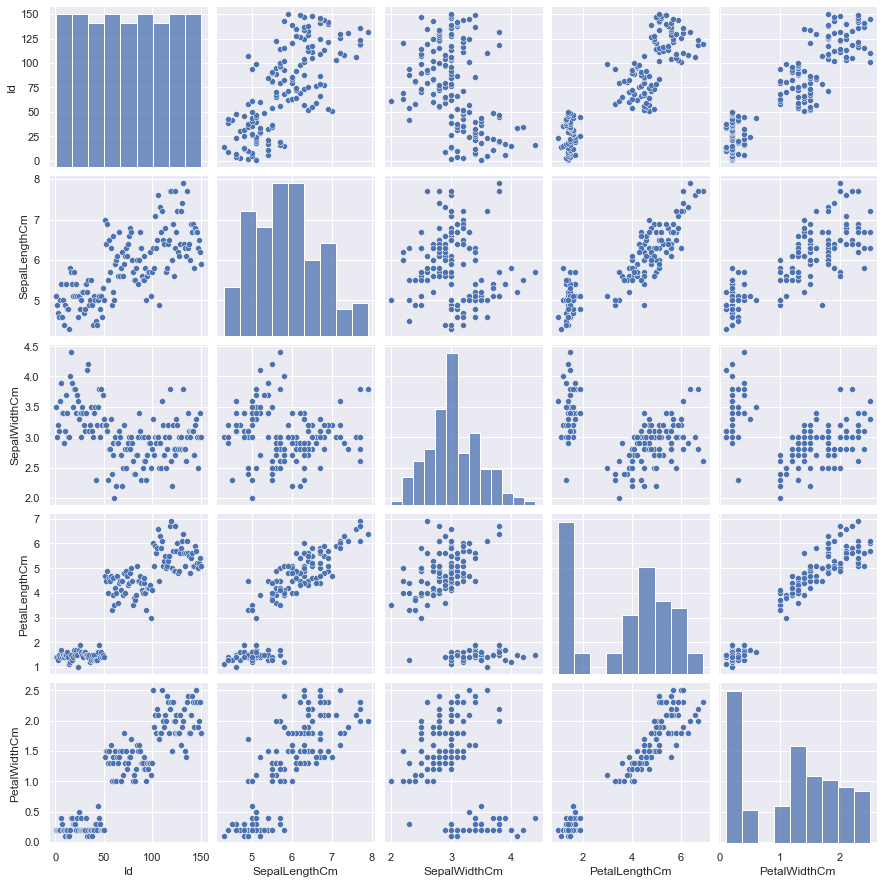

In [76]:
#visualising the data in pairplot
sns.pairplot(df,palette= 'Dark2', diag_kind='auto',height=2.5)

We can see that the data points are grouped. This implies that we can apply _Cluster Analysis_ to get a valid clusters.

##### Kmeans Clustering

In [14]:
#calculate the squared of distances of data points to centroids
x = df.iloc[:, [0, 1, 2, 3]].values
sum_of_squared_distance = []
K = (1,2,3,4,5,6,7,8,9,10)
optimalK = 1
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(x)
  sum_of_squared_distance.append(km.inertia_)
  if k > 1:
    ratio = sum_of_squared_distance[k-1]/sum_of_squared_distance[k-2]
    if ratio < 0.55:
      optimalK = k  #determine optimal number of clusters

print("Optimal Number of Clusters =",optimalK)

Optimal Number of Clusters = 3


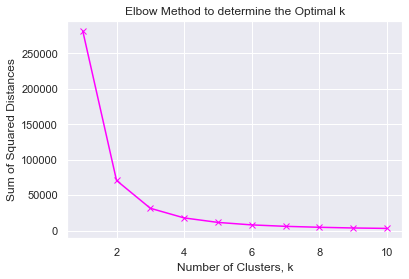

In [53]:
#elbow graph to visually determine the optimum number of clusters
plt.plot(K, sum_of_squared_distance, 'bx-', color="magenta")
plt.xlabel('Number of Clusters, k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to determine the Optimal k')
plt.show()

In elbow method, the point where the elbow occurs is the optimum number of cluster.
Here, we choose the number of clusters for this dataset to be _3_ .

In [22]:
#creating the kmeans classifiers

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
kmeans.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

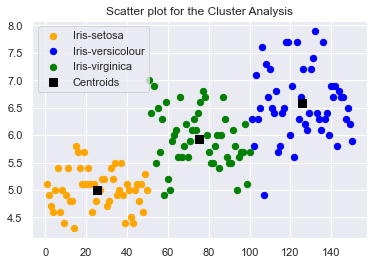

In [60]:
#visualise the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 40, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 40, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 40, c = 'green', label = 'Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids', marker = 's')
plt.legend()
plt.title('Scatter plot for the Cluster Analysis')
plt.show()

The scatter plot shows 3 clusters for each species of the iris dataset. The centeroids for each cluster are also represented.

### Conclusion
#### The iris data set was found to be divided into 3 clusters by K-Means algorithm and visually.